# import

In [1]:
from astropy.io import fits
import time
#import urllib2# python2
import urllib#python3

import datetime
#from itertools import ifilter python2
from collections import Counter, defaultdict
import xml.etree.ElementTree as ET
import h5py
from bs4 import BeautifulSoup
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
#import bibtexparser

pd.set_option('mode.chained_assignment','warn')

In [2]:
import numpy as np
from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
import astropy
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

In [3]:
from astropy.table import Table
import os
from collections import OrderedDict
from adjustText import adjust_text

In [4]:
from astropy.io import fits 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import cm

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [5]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com
import os
import sys
from time import time

import numpy as np
from matplotlib import pyplot as plt

from astropy.visualization import hist

from astroML.datasets import fetch_imaging_sample, fetch_sdss_S82standards
from astroML.crossmatch import crossmatch_angular



In [6]:
def drop_index(data):
    data=data.reset_index(drop=True)
    return data

In [7]:
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))

# BAT_105m

In [8]:
bat_path='/Volumes/ExtremeSSD/CLAGN_statistic_plot/Source_lists'

BAT_105m_pd=pd.read_csv('%s/BAT_105m_catalog_07jul2019.txt'%bat_path,delimiter='|',na_values='NaN')
#BAT_105m_pd=BAT_105m_pd[BAT_105m_pd['             BAT_NAME'].notnull()]
BAT_105m_pd=BAT_105m_pd[1:]
BAT_105m_pd=drop_index(BAT_105m_pd)
BAT_105m_pd.columns=['BAT_seq', 'BAT_NAME', 'RA', 'DEC', 'SNR',
       'CName', 'OTHER_NAME',
       'CTPT_RA', 'CTPT_DEC', 'FLUX', 'FLUX_LO', 'FLUX_HI', 'CONTA',
       'GAMM', 'GAMM.1', 'GAMM.2', 'CHI_SQ_R', 'REDSHIF', 'LUM',
       'ASSOC_STREN', 'CL2', 'Type']

types_BAT105m=[]
for i in BAT_105m_pd['Type']:
    if i not in types_BAT105m:
        types_BAT105m.append(i)

types_BAT105m

In [14]:
types_BAT105m_AGN=['Sy1.9',
 'Sy1.5',
 'Sy2',
 'Sy1.2',
 'Beamed AGN','Sy1','Unknown AGN',
 'Sy1.8','LINER','Sy1;broad-line AGN',]

BAT_105m_pd['Type_AGN']=0
for i in range(len(BAT_105m_pd)):
    if BAT_105m_pd['Type'][i] in types_BAT105m_AGN:
        BAT_105m_pd.loc[i,'Type_AGN']=1

BAT_105m_AGN=BAT_105m_pd[BAT_105m_pd['Type_AGN']==1]
BAT_105m_AGN=drop_index(BAT_105m_AGN)

BAT_105m_Seyfert=BAT_105m_pd[BAT_105m_pd['Type'].str.startswith('Sy')]
BAT_105m_Seyfert=BAT_105m_Seyfert[BAT_105m_Seyfert['Type'].str.contains('candidate')==False]
BAT_105m_Seyfert=BAT_105m_Seyfert[BAT_105m_Seyfert['Type'].str.contains('Symbiotic star')==False]
#BAT_105m_Seyfert=BAT_105m_Seyfert[BAT_105m_Seyfert['Type'].str.contains('Symbiotic star')==False]
BAT_105m_Seyfert=drop_index(BAT_105m_Seyfert)

In [ ]:
BAT_105m_AGN_match.columns

## BAT_105m_cds

In [9]:
BAT_105m_2_cds=Table.read('/Users/brettlv/blog/IHEP_sync/data/AGNmass/BAT_105m/J_ApJS_235_4/table2.dat',
                      readme="/Users/brettlv/blog/IHEP_sync/data/AGNmass/BAT_105m/J_ApJS_235_4/ReadMe",
                      format="ascii.cds",)

BAT_105m_2_cds

In [10]:
BAT_105m_3_cds=Table.read('/Users/brettlv/blog/IHEP_sync/data/AGNmass/BAT_105m/J_ApJS_235_4/table3.dat',
                      readme="/Users/brettlv/blog/IHEP_sync/data/AGNmass/BAT_105m/J_ApJS_235_4/ReadMe",
                      format="ascii.cds",)

In [ ]:
BAT_105m_3_cds[:4]

In [11]:
types_BAT105m_cds=[]
for i in BAT_105m_3_cds['Type']:
    if i not in types_BAT105m_cds:
        types_BAT105m_cds.append(i)

In [12]:
types_BAT105m_cds

['Sy1.9',
 'Sy1.5',
 'Sy2',
 'Sy1.2',
 'Beamed AGN',
 'CV',
 'SNR',
 'Unknown AGN',
 'Sy1',
 'HMXB',
 'U2',
 'Galaxy Cluster',
 'multiple',
 'Sy1.8',
 'Pulsar',
 'Compact group of gal',
 'LINER',
 'U1',
 'Sy2 candidate',
 'Nova',
 'LMXB',
 'Open star cluster',
 'Sy1;broad-line AGN',
 'Starburst galaxy',
 'Symbiotic star',
 'XRB',
 'star',
 'Galactic Center',
 'molecular cloud',
 'U3',
 'Gamma-ray source',
 'GC']

In [15]:
types_BAT105m_AGN

['Sy1.9',
 'Sy1.5',
 'Sy2',
 'Sy1.2',
 'Beamed AGN',
 'Sy1',
 'Unknown AGN',
 'Sy1.8',
 'LINER',
 'Sy1;broad-line AGN']

In [ ]:
BAT_105m_3_cds.colnames

## BAT_105m_AGN

In [16]:
BAT_105m_3_cds['Type_AGN']=0
for i in range(len(BAT_105m_3_cds)):
    if BAT_105m_3_cds['Type'][i] in types_BAT105m_AGN:
        BAT_105m_3_cds['Type_AGN'][i]=1

BAT_105m_AGN=BAT_105m_3_cds[BAT_105m_3_cds['Type_AGN']==1]
#BAT_105m_AGN=drop_index(BAT_105m_AGN)

In [17]:
BAT_105m_AGN.colnames

['Seq',
 '---',
 'Swift',
 'RAdeg',
 'DEdeg',
 'S/N',
 'CName',
 'RACdeg',
 'DECdeg',
 'Flux',
 'e_Flux',
 'E_Flux',
 'Gamma',
 'e_Gamma',
 'E_Gamma',
 'Chi2',
 'z',
 'logL',
 'Class',
 'Type',
 'Type_AGN']

In [18]:
len(BAT_105m_AGN)

1095

In [19]:
BAT_105m_AGN

Seq,---,Swift,RAdeg,DEdeg,S/N,CName,RACdeg,DECdeg,Flux,e_Flux,E_Flux,Gamma,e_Gamma,E_Gamma,Chi2,z,logL,Class,Type,Type_AGN
,,,deg,deg,,,deg,deg,1e-15 W / m2,1e-15 W / m2,1e-15 W / m2,,,,,,[10-7W],,,
int64,str5,str16,float64,float64,float64,str30,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str20,int64
1,SWIFT,J0001.0-0708,0.22826567,-7.16421807,7.73,2MASXJ00004876-0709117,0.2032,-7.1532,13.49,11.1,16.01,2.21,1.8,2.7,1.3,0.037,43.6,50,Sy1.9,1
2,SWIFT,J0001.6-7701,0.4453023,-77.0003105,6.32,2MASXJ00014596-7657144,0.4419,-76.954,13.23,10.47,15.97,1.62,1.22,2.04,2.2,0.058,44.0,50,Sy1.9,1
3,SWIFT,J0002.5+0323,0.61264578,3.36496155,5.5,NGC7811,0.6103,3.3519,10.79,7.89,13.64,1.95,1.38,2.66,0.7,0.025,43.2,40,Sy1.5,1
4,SWIFT,J0003.3+2737,0.85635079,27.64336602,5.98,2MASXJ00032742+2739173,0.8643,27.6548,10.29,7.75,12.77,2.12,1.61,2.73,0.4,0.039,43.5,50,Sy2,1
5,SWIFT,J0005.0+7021,0.93403447,70.35778508,8.52,2MASXJ00040192+7019185,1.0082,70.3217,13.41,11.09,15.7,2.07,1.68,2.52,1.0,0.096,44.4,50,Sy1.9,1
6,SWIFT,J0006.2+2012,1.5962887,20.24152838,10.42,Mrk335,1.5813,20.2029,15.97,13.7,18.44,2.31,1.97,2.71,0.6,0.025,43.3,40,Sy1.2,1
7,SWIFT,J0009.4-0037,2.30481254,-0.63899431,4.26,SDSSJ000911.57-003654.7,2.2982,-0.6152,10.17,7.09,13.58,1.68,1.0,2.43,0.3,0.073,44.1,50,Sy2,1
8,SWIFT,J0010.5+1057,2.61619405,10.96925199,14.02,Mrk1501,2.6292,10.9749,30.34,27.53,33.4,1.82,1.61,2.04,0.6,0.089,44.7,80,Beamed AGN,1


In [20]:
BAT_105m_AGN['D_cm']=cosmo.luminosity_distance(BAT_105m_AGN['z']).to(u.cm).value    

In [21]:
BAT_105m_AGN_with_z=BAT_105m_AGN[BAT_105m_AGN['D_cm']>0]

In [22]:
len(BAT_105m_AGN_with_z)

1019

In [23]:
BAT_105m_AGN_with_z

Seq,---,Swift,RAdeg,DEdeg,S/N,CName,RACdeg,DECdeg,Flux,e_Flux,E_Flux,Gamma,e_Gamma,E_Gamma,Chi2,z,logL,Class,Type,Type_AGN,D_cm
,,,deg,deg,,,deg,deg,1e-15 W / m2,1e-15 W / m2,1e-15 W / m2,,,,,,[10-7W],,,,
int64,str5,str16,float64,float64,float64,str30,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str20,int64,float64
1,SWIFT,J0001.0-0708,0.22826567,-7.16421807,7.73,2MASXJ00004876-0709117,0.2032,-7.1532,13.49,11.1,16.01,2.21,1.8,2.7,1.3,0.037,43.6,50,Sy1.9,1,5.027998025155431e+26
2,SWIFT,J0001.6-7701,0.4453023,-77.0003105,6.32,2MASXJ00014596-7657144,0.4419,-76.954,13.23,10.47,15.97,1.62,1.22,2.04,2.2,0.058,44.0,50,Sy1.9,1,8.002299057050055e+26
3,SWIFT,J0002.5+0323,0.61264578,3.36496155,5.5,NGC7811,0.6103,3.3519,10.79,7.89,13.64,1.95,1.38,2.66,0.7,0.025,43.2,40,Sy1.5,1,3.367242262030211e+26
4,SWIFT,J0003.3+2737,0.85635079,27.64336602,5.98,2MASXJ00032742+2739173,0.8643,27.6548,10.29,7.75,12.77,2.12,1.61,2.73,0.4,0.039,43.5,50,Sy2,1,5.307556341982924e+26
5,SWIFT,J0005.0+7021,0.93403447,70.35778508,8.52,2MASXJ00040192+7019185,1.0082,70.3217,13.41,11.09,15.7,2.07,1.68,2.52,1.0,0.096,44.4,50,Sy1.9,1,1.3598608289401217e+27
6,SWIFT,J0006.2+2012,1.5962887,20.24152838,10.42,Mrk335,1.5813,20.2029,15.97,13.7,18.44,2.31,1.97,2.71,0.6,0.025,43.3,40,Sy1.2,1,3.367242262030211e+26
7,SWIFT,J0009.4-0037,2.30481254,-0.63899431,4.26,SDSSJ000911.57-003654.7,2.2982,-0.6152,10.17,7.09,13.58,1.68,1.0,2.43,0.3,0.073,44.1,50,Sy2,1,1.0178842602345456e+27
8,SWIFT,J0010.5+1057,2.61619405,10.96925199,14.02,Mrk1501,2.6292,10.9749,30.34,27.53,33.4,1.82,1.61,2.04,0.6,0.089,44.7,80,Beamed AGN,1,1.2547373697981486e+27


# BAT_70m

In [68]:
datadir_AGNmass='/Users/brettlv/blog/IHEP_sync/data/AGNmass'
data_BAT_70m=Table.read('%s/BAT_70m/J_ApJS_207_19/table3.dat'%datadir_AGNmass,
                      readme="%s/BAT_70m/J_ApJS_207_19/ReadMe"%datadir_AGNmass,
                      format="ascii.cds",)

In [69]:
data_BAT_70m

Seq,---,SWIFT,RAdeg,DEdeg,S/N,CName,OName,RACdeg,DECdeg,Flux,e_Flux,E_Flux,Cont,Gamma,e_Gamma,E_Gamma,chi2,z,u_z,logL,AS,Cl,Type
,,,deg,deg,,,,deg,deg,fW / m2,fW / m2,fW / m2,,,,,,,,[10-7W],,,
int64,str5,str13,float64,float64,float64,str26,str24,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,int64,int64,str21
1,SWIFT,J0001.0-0708,0.261,-7.123,6.1,2MASX J00004876-0709117,--,0.2032,-7.1532,13.03,9.05,17.56,--,2.17,1.75,2.69,0.6,--,--,--,--,2,Galaxy
2,SWIFT,J0001.6-7701,0.326,-77.001,5.41,Fairall 1203,--,0.4419,-76.954,10.1,6.61,14.08,--,2.02,1.54,2.6,0.7,0.0584,--,43.92,--,4,Sy1
3,SWIFT,J0002.5+0323,0.664,3.332,5.1,NGC 7811,--,0.6103,3.3519,11.69,7.36,16.64,--,1.82,1.31,2.39,0.5,0.0255,--,43.24,--,4,Sy1.5
4,SWIFT,J0003.3+2737,0.862,27.676,5.03,2MASX J00032742+2739173,--,0.8643,27.6548,13.0,8.76,17.7,--,1.66,1.25,2.12,1.0,--,?,--,--,2,Galaxy
5,SWIFT,J0005.0+7021,1.011,70.327,7.2,2MASX J00040192+7019185,IGR J00040+7020,1.0082,70.3217,12.67,9.38,16.33,--,2.19,1.83,2.61,0.7,0.096,--,44.47,--,5,Sy2
6,SWIFT,J0006.2+2012,1.58,20.178,10.04,Mrk 335,--,1.5813,20.2029,18.43,14.79,22.42,--,2.32,2.03,2.65,0.3,0.0258,--,43.45,4,4,Sy1.2
7,SWIFT,J0009.4-0037,2.316,-0.575,4.99,2MASX J00091156-0036551,--,2.2982,-0.6152,9.26,5.31,13.99,--,2.14,1.52,2.97,0.4,0.0733,--,44.08,--,5,Sy2
8,SWIFT,J0010.5+1057,2.612,10.953,13.35,Mrk 1501,--,2.6292,10.9749,31.37,26.89,36.08,--,1.87,1.68,2.07,0.9,0.0893,--,44.8,--,4,Sy1.2


# BAT_spectro_70m

ReadMe            80        .   This file
table2.dat       122      641   Optical spectra
table4.dat        87      641  *Stellar velocity dispersion measurements
table5.dat       117      641  *Emission line measurements -
                                 [OII]3727 spectral region
table6.dat        61      641  *Emission line measurements -
                                 narrow Hbeta spectral region
table7.dat        84      641  *Emission line measurements -
                                 narrow Halpha spectral region
table8.dat       123      641  *Strong emission line classification
table9.dat       102      302   Properties derived from spectral decomposition
                                 of broad Hbeta and broad Halpha sources
table10.dat       74       18   Properties derived from spectral decomposition
                                 of high redshift sources

Note on table4.dat, table5.dat, table6.dat, table7.dat, table8.dat:
 Source #250 has been excluded from the final table:
 its spectrum was actually that of a star rather than an AGN.

In [24]:
datadir_AGNmass='/Users/brettlv/blog/IHEP_sync/data/AGNmass'
data_Koss17_t2_counter=Table.read('%s/BAT_70m_specscopic/SwiftBATAGNSpectroscopicSurveyJ_ApJ_850_74/table2.dat'%datadir_AGNmass,
                      readme="%s/BAT_70m_specscopic/SwiftBATAGNSpectroscopicSurveyJ_ApJ_850_74/ReadMe"%datadir_AGNmass,
                      format="ascii.cds",)

data_Koss17_t2_counter.colnames

In [66]:
len(data_Koss17_t2_counter)

641

In [67]:
data_Koss17_t2_counter

Seq,CName,Source,z[OIII],Dist,logLx,logLbol,Date,Exp,Slit,Type,Beam,nH
,,,,Mpc,[10-7W],[10-7W],,s,kpc,,,
int64,str24,str9,float64,float64,float64,float64,str21,int64,float64,float64,int64,str13
1,2MASX J00004876-0709117,SDSS,0.037,165.14,43.63,44.53,25/10/2013,5401,1.54,1.9,0,Obs.
2,Fairall 1203,6DF,0.058,261.64,43.92,44.82,01/09/2005,1200,8.02,1.9,0,<10^20^cm^-2^
4,2MASX J00032742+2739173,SDSS,0.04,175.13,43.68,44.58,09/09/2013,4500,1.63,2.0,0,Obs.
5,2MASX J00040192+7019185,Masetti,0.096,442.73,44.47,45.38,27/11/2006,1800,--,1.9,0,Obs.
6,Mrk 335,Perkins,0.026,113.28,43.45,44.36,01/04/2011,1800,1.07,1.2,0,Unobs.
7,2MASX J00091156-0036551,SDSS,0.073,331.27,44.09,44.99,06/09/2000,2700,4.49,2.0,0,Obs.
8,Mrk 1501,Gemini,0.089,408.45,44.8,45.7,17/08/2012,595,1.82,1.5,1,Unobs.
10,2MASX J00210753-1910056,6DF,0.096,439.38,44.6,45.5,27/08/2003,1200,13.01,1.9,0,Unobs.


In [25]:
data_Koss17_t4=Table.read('%s/BAT_70m_specscopic/SwiftBATAGNSpectroscopicSurveyJ_ApJ_850_74/table4.dat'%datadir_AGNmass,
                      readme="%s/BAT_70m_specscopic/SwiftBATAGNSpectroscopicSurveyJ_ApJ_850_74/ReadMe"%datadir_AGNmass,
                      format="ascii.cds",)

In [30]:
data_Koss17_t5=Table.read('%s/BAT_70m_specscopic/SwiftBATAGNSpectroscopicSurveyJ_ApJ_850_74/table5.dat'%datadir_AGNmass,
                      readme="%s/BAT_70m_specscopic/SwiftBATAGNSpectroscopicSurveyJ_ApJ_850_74/ReadMe"%datadir_AGNmass,
                      format="ascii.cds",)

In [26]:
data_Koss17_t6=Table.read('%s/BAT_70m_specscopic/SwiftBATAGNSpectroscopicSurveyJ_ApJ_850_74/table6.dat'%datadir_AGNmass,
                      readme="%s/BAT_70m_specscopic/SwiftBATAGNSpectroscopicSurveyJ_ApJ_850_74/ReadMe"%datadir_AGNmass,
                      format="ascii.cds",)

In [27]:
data_Koss17_t7=Table.read('%s/BAT_70m_specscopic/SwiftBATAGNSpectroscopicSurveyJ_ApJ_850_74/table7.dat'%datadir_AGNmass,
                      readme="%s/BAT_70m_specscopic/SwiftBATAGNSpectroscopicSurveyJ_ApJ_850_74/ReadMe"%datadir_AGNmass,
                      format="ascii.cds",)

In [31]:
data_Koss17_t8=Table.read('%s/BAT_70m_specscopic/SwiftBATAGNSpectroscopicSurveyJ_ApJ_850_74/table8.dat'%datadir_AGNmass,
                      readme="%s/BAT_70m_specscopic/SwiftBATAGNSpectroscopicSurveyJ_ApJ_850_74/ReadMe"%datadir_AGNmass,
                      format="ascii.cds",)

In [28]:
data_Koss17_t9_broadline=Table.read('%s/BAT_70m_specscopic/SwiftBATAGNSpectroscopicSurveyJ_ApJ_850_74/table9.dat'%datadir_AGNmass,
                      readme="%s/BAT_70m_specscopic/SwiftBATAGNSpectroscopicSurveyJ_ApJ_850_74/ReadMe"%datadir_AGNmass,
                      format="ascii.cds",)

In [29]:
data_Koss17_t10=Table.read('%s/BAT_70m_specscopic/SwiftBATAGNSpectroscopicSurveyJ_ApJ_850_74/table10.dat'%datadir_AGNmass,
                      readme="%s/BAT_70m_specscopic/SwiftBATAGNSpectroscopicSurveyJ_ApJ_850_74/ReadMe"%datadir_AGNmass,
                      format="ascii.cds",)

# BAT_spectro_V_Xray

In [58]:
data_Ricci17_t1=Table.read('%s/BAT_Specscopic_V/BAT AGN Spectroscopic Survey. V. X-Ray Properties of the Swift BAT 70-month AGN Catalog J_ApJS_233_17/table1.dat'%datadir_AGNmass,
                      readme="%s/BAT_Specscopic_V/BAT AGN Spectroscopic Survey. V. X-Ray Properties of the Swift BAT 70-month AGN Catalog J_ApJS_233_17/ReadMe"%datadir_AGNmass,
                      format="ascii.cds",)

In [59]:
data_Ricci17_t14=Table.read('%s/BAT_Specscopic_V/BAT AGN Spectroscopic Survey. V. X-Ray Properties of the Swift BAT 70-month AGN Catalog J_ApJS_233_17/table14.dat'%datadir_AGNmass,
                      readme="%s/BAT_Specscopic_V/BAT AGN Spectroscopic Survey. V. X-Ray Properties of the Swift BAT 70-month AGN Catalog J_ApJS_233_17/ReadMe"%datadir_AGNmass,
                      format="ascii.cds",)

In [61]:
data_Ricci17_t1.colnames

['---',
 'SWIFT',
 'DZ',
 'OName',
 'RAdeg',
 'DEdeg',
 'z',
 'b_zphot',
 'B_zphot',
 'Dist',
 'BZ']

In [65]:
data_Ricci17_t1

---,SWIFT,DZ,OName,RAdeg,DEdeg,z,b_zphot,B_zphot,Dist,BZ
,,,,deg,deg,,,,Mpc,
str5,str14,str1,str25,float64,float64,float64,float64,float64,float64,str3
SWIFT,J0001.0-0708,--,2MASXJ00004876-0709117,0.2032,-7.1532,0.0375,--,--,165.2,--
SWIFT,J0001.6-7701,--,2MASXJ00014596-7657144,0.4419,-76.954,0.0584,--,--,261.2,--
SWIFT,J0002.5+0323,--,NGC7811,0.6103,3.3519,0.0255,--,--,111.3,--
SWIFT,J0003.3+2737,--,2MASXJ00032742+2739173,0.8643,27.6548,0.0397,--,--,175.2,--
SWIFT,J0005.0+7021,--,2MASXJ00040192+7019185,1.0082,70.3217,0.096,--,--,440.7,--
SWIFT,J0006.2+2012,--,Mrk335,1.5813,20.2029,0.0258,--,--,112.7,--
SWIFT,J0009.4-0037,--,SDSSJ000911.57-003654.7,2.2982,-0.6152,0.0733,--,--,331.3,--
SWIFT,J0010.5+1057,--,Mrk1501,2.6292,10.9749,0.0893,--,--,408.1,BZQ


In [64]:
len(data_Ricci17_t1)

838

In [62]:
data_Ricci17_t14.colnames

['---', 'SWIFT', 'F2-10', 'logL2-10']

In [63]:
data_Ricci17_t14

---,SWIFT,F2-10,logL2-10
,,1e-12 mW / m2,[10-7W]
str5,str14,float64,float64
SWIFT,J0025.8+6818,13.1,42.63
SWIFT,J0030.0-5904,7.5,43.16
SWIFT,J0105.5-4213,7.1,43.17
SWIFT,J0111.4-3808,28.4,42.95
SWIFT,J0122.8+5003,10.6,43.0
SWIFT,J0128.9-6039,5.9,44.86
SWIFT,J0130.0-4218,7.4,43.05
SWIFT,J0242.6+0000,76.4,42.39


# imX,stX,gleamX,bssX,superX,

# gleam data

In [32]:
gleam_EGCv2_path='/Volumes/ExtremeSSD/Papers_Project/mwa_catalog_paper/gleam_survey/GLEAM_EGC_v2.fits'

In [33]:
GGSM_path='/Volumes/ExtremeSSD/Papers_Project/MWA/MWA_Code/GLEAM-X-pipeline/models/GGSM.fits'

In [34]:
gleam=fits.open(gleam_EGCv2_path)
gleamdata=gleam[1].data

In [35]:
GGSM=fits.open(GGSM_path)
GGSMdata=GGSM[1].data

## gleamX  GGSMX

In [36]:
gleamX = np.empty((len(gleamdata), 2), dtype=np.float64)
gleamX[:, 0] = gleamdata['RAJ2000']
gleamX[:, 1] = gleamdata['DEJ2000']

In [37]:
GGSMX = np.empty((len(GGSMdata), 2), dtype=np.float64)
GGSMX[:, 0] = GGSMdata['RAJ2000']
GGSMX[:, 1] = GGSMdata['DEJ2000']

In [ ]:
GGSMdata.columns

In [38]:
GGSMdata_10Jy=GGSMdata[GGSMdata['S_200']>10]

## gleamdata alpha_select

In [ ]:
gleamdata_alpha_select_1=gleamdata[gleamdata['alpha']>0.2]#mean -0.8
gleamdata_alpha_select_2=gleamdata[gleamdata['alpha']<-1.8]#mean -0.8

## gleam sight of view

In [ ]:
plt.scatter(gleamdata['RAJ2000'],gleamdata['DEJ2000'])
plt.title('gleam sight of view')

In [ ]:
plt.scatter(GGSMdata['RAJ2000'],GGSMdata['DEJ2000'])
plt.title('gleam sight of view')

plt.hist(gleamdata['alpha'],range=(-2,0.5),bins=100)

In [ ]:
plt.hist(gleamdata_alpha_select_1['alpha'],range=(-0.2,1),bins=100)

In [ ]:
plt.hist(gleamdata_alpha_select_2['alpha'],range=(-2.5,-1.8),bins=100)

In [ ]:
gleamdata_alpha_select_1.size,gleamdata_alpha_select_2.size

gleamdata_alpha_select_2['Name']

In [ ]:
?fetch_sdss_S82standards

## SDSS imaging data

#get imaging data
#image_data = fetch_imaging_sample()
image_data_fit=fits.open('/Users/brettlv/astroML_data/sgSDSSimagingSample.fit')
image_data=image_data_fit[1].data
'''imX = np.empty((len(image_data), 2), dtype=np.float64)
imX[:, 0] = image_data['ra']
imX[:, 1] = image_data['dec']
'''

In [ ]:
image_data_fit[1].data.columns

## SDSS Stripe 82 standard stars data

In [ ]:
# get standard stars
#standards_data = fetch_sdss_S82standards()
import pandas as pd
standards_data=pd.read_table('/Users/brettlv/astroML_data/stripe82calibStars_v2.6.dat',header=None,skiprows=range(0, 41),sep='\s+')
print(standards_data.columns)

In [ ]:
### This is file stripe82calibStars_v2.6.dat created by ZI on Mar 8,2007
###
### A catalog of 1,006,849 candidate standard stars from SDSS stripe 82
###  0) every line starts with the string CALIBSTARS
###  1) RA Dec RArms Decrms: the mean position and its rms per coordinate,
###     this is J2000, decimal degrees for RA and Dec, and arcsec for rms
###     NB: standard errors can be computed as rms/sqrt(Ntot)
###  2) Ntot: the total number of epochs
###  3) Ar: the Schlegel, Finkbeiner & Davis (1998) ISM extinction value in
###     the r band; extinction in other bands can be computed as [Rv=3.1]:
###     Am = Cm*Ar, with Cm=(1.873, 1.377, 0.758, 0.537) for m=(ugiz)
###  4) and then in each band (ugriz, in this order):
###       (Nobs mmed mmu msig mrms mchi2), which are:
###       the total number of observations in this band
###       the median magnitude
###       the mean magnitude
###       the standard error for the mean (1.25 larger for the median)
###       the root-mean-square scatter
###       chi2 per degree of freedom (computed using the mean magnitude)

In [ ]:
standards_data.rename(columns={0:'CALIBSTARS',1:'RA',2:'DEC',3:'RArms', 4:'Decrms',5:'Ntot_epochs'}, inplace = True)

In [ ]:
len(standards_data)

In [ ]:
standards_data.head()

In [ ]:
standards_data.columns

In [ ]:
stX = np.empty((len(standards_data), 2), dtype=np.float64)
stX[:, 0] = standards_data['RA']
stX[:, 1] = standards_data['DEC']

# 3CR

In [119]:
p3CR_V=pd.read_excel('/Users/brettlv/Downloads/mwa/sources_candidate//3CR.xlsx',sheet_name='工作表1')

p3CR_IV=pd.read_excel('/Users/brettlv/Downloads/mwa/sources_candidate//3CR.xlsx',sheet_name='工作表2')

p3CR_III=pd.read_excel('/Users/brettlv/Downloads/mwa/sources_candidate/3CR.xlsx',sheet_name='工作表3')

p3CR_II=pd.read_excel('/Users/brettlv/Downloads/mwa/sources_candidate/3CR.xlsx',sheet_name='工作表4')

In [120]:
def plot_LOIII_L151_data(data,name1_label,name2_label,flux_label):   
    for i in range(len(data)):
        LOIII=data['logL[OIII]'][i]
        name=data[name1_label][i].strip()
        z=data['z'][i]
        d_cm=cosmo.luminosity_distance(z).to(u.cm).value
        
        TGSS=TGSS_data_1[TGSS_data_1[name2_label]==name]
        TGSS_F151MHz=TGSS[flux_label]
        TGSS_L151MHz=  4*np.pi*d_cm**2*TGSS_F151MHz*1.0e-23
        
        if TGSS_L151MHz:
            ax.scatter(TGSS_L151MHz,LOIII)

## plot_3CR_LOIII_L178

Log L178 L [O  III]
L178 L  [O   III] 
L 178 [O III] FR
L178 OIII FR


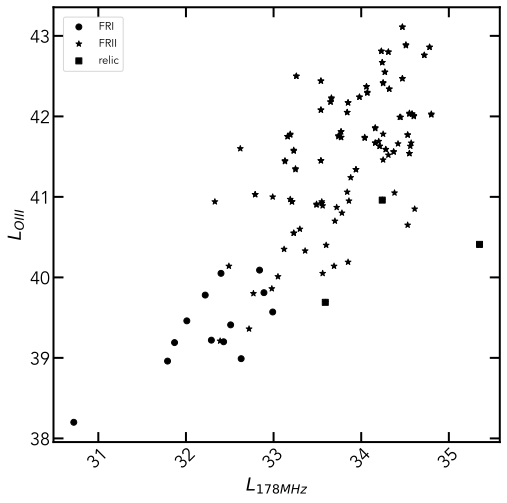

In [122]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

#ax.hist(BAT_105m_Seyfert_data_1['sigma_m_w1_neo'],bins=50,lw=2,histtype='step',ec='red', fc='red',label='Type1',linestyle='-.')

#ax.axvline(np.mean(BAT_105m_Seyfert_data_1['sigma_m_w1_neo']),color='red',ls=':')


        

#p3CR
plotdata=p3CR_V
column_x=3
column_y=4
print(plotdata.columns[column_x],plotdata.columns[column_y])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],
                   color='black',marker='*',label='FRII')

plotdata=p3CR_IV
column_x=4
column_y=2

print(plotdata.columns[column_x],plotdata.columns[column_y])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],
                   color='black',marker='s',label='relic')
        
        
        
plotdata=p3CR_III
column_x=4
column_y=3
column_l=7
print(plotdata.columns[column_x],plotdata.columns[column_y],plotdata.columns[column_l])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        if plotdata[plotdata.columns[column_l]][i]==1:
            label='FRI'
            marker='o'
        elif plotdata[plotdata.columns[column_l]][i]==2:
            label='FRII'
            marker='*'
        else:
            label=''
            
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],                   
                   color='black',marker=marker,label=label)
plotdata=p3CR_II
column_x=4
column_y=3
column_l=7

print(plotdata.columns[column_x],plotdata.columns[column_y],plotdata.columns[column_l])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        if plotdata[plotdata.columns[column_l]][i]==1:
            label='FRI'
            marker='o'
        elif plotdata[plotdata.columns[column_l]][i]==2:
            label='FRII'
            marker='*'
        else:
            label=''            
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],                   
                   color='black',marker=marker,label=label)
    
        
            
#ax.scatter(np.log10(L_HerA_178MHz_total),np.log10(L_HerA_OIII),color='red',marker='*',label='HerA tot')
#ax.scatter(np.log10(L_HerA_178MHz_core),np.log10(L_HerA_OIII),color='red',marker='o',label='HerA core')
#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$L_{178MHz}$')
ax.set_ylabel(r'$L_{OIII}$')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('', dpi=400, transparent=False, bbox_inches='tight')


# X

## BAT_105m_AGNX

In [40]:
len(BAT_105m_AGN_with_z),len(BAT_105m_AGN)

(1019, 1095)

BAT_105m_AGN_with_z.colnames

In [41]:
BAT_105m_AGN_with_zX= np.empty((len(BAT_105m_AGN_with_z), 2), dtype=np.float64)
BAT_105m_AGN_with_zX[:, 0] = BAT_105m_AGN_with_z['RAdeg']
BAT_105m_AGN_with_zX[:, 1] = BAT_105m_AGN_with_z['DEdeg']

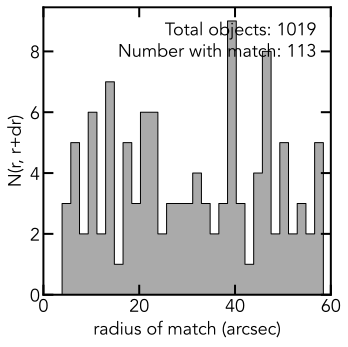

In [42]:
# crossmatch catalogs
max_radius = 60. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(BAT_105m_AGN_with_zX, GGSMX, max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match, 
     #bins='knuth', 
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (BAT_105m_AGN_with_zX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()



        
        

In [43]:
BAT_105m_AGN_with_zX

array([[ 2.28265670e-01, -7.16421807e+00],
       [ 4.45302300e-01, -7.70003105e+01],
       [ 6.12645780e-01,  3.36496155e+00],
       ...,
       [ 3.52030604e+02,  8.83485170e+00],
       [ 3.52624115e+02, -2.47377316e+00],
       [ 3.58982801e+02,  2.55516968e+01]])

In [52]:
BAT_105m_AGN_with_z_match=BAT_105m_AGN_with_z[match]
#BAT_105m_AGN_match=drop_index(BAT_105m_AGN_match)
GGSMmatch=GGSMdata[ind[match]]   

In [51]:
len(GGSMmatch)

113

BAT_105m_AGN_with_z_match.colnames

## FX-F200MHz

Text(0.5, 1.0, 'BAT_AGN cs GGSM ')

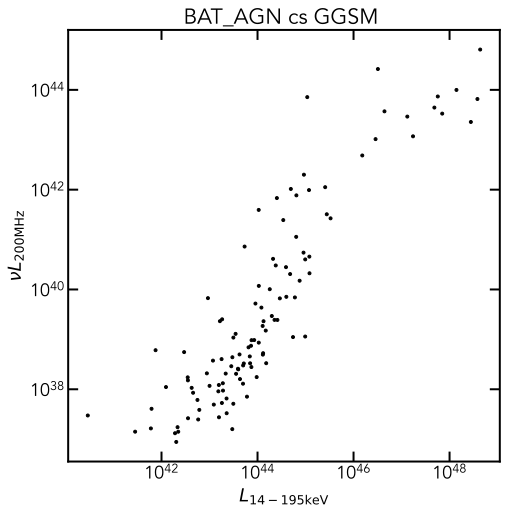

In [57]:
fig = plt.figure(figsize=(6, 6))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

for i in range(len(BAT_105m_AGN_with_z_match)):
    d_cm_i=BAT_105m_AGN_with_z_match['D_cm'][i]
    s200_i= GGSMmatch['S_200'][i]
    
    ax.scatter(float(BAT_105m_AGN_with_z_match['Flux'][i])*1e-12*4*np.pi*d_cm_i**2,
                   200e6*s200_i*1e-23*4*np.pi*d_cm_i**2,
                   color='black',
                   marker='.',
                   )


ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

'''ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))
    '''
ax.semilogx()
ax.semilogy()
#set_ax_locator(ax,xma=1,xmi=0.5,yma=1,ymi=0.5)
set_ax_tick(ax)
ax.set_xlabel(r'$L_\mathrm{14-195keV}$')
ax.set_ylabel(r'$\nu L_\mathrm{200MHz}$')
plt.title(r'BAT_AGN cs GGSM ')



## BAT_70m_AGNX

In [111]:
BAT_70m_AGNX= np.empty((len(data_BAT_70m), 2), dtype=np.float64)
BAT_70m_AGNX[:, 0] = data_BAT_70m['RAdeg']
BAT_70m_AGNX[:, 1] = data_BAT_70m['DEdeg']

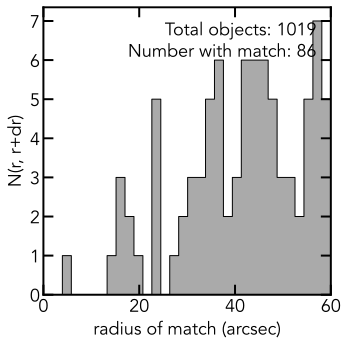

In [112]:
# crossmatch catalogs
max_radius = 60. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(BAT_70m_AGNX, GGSMX, max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match, 
     #bins='knuth', 
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (BAT_105m_AGN_with_zX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()
    

In [113]:
data_BAT_70m_match=data_BAT_70m[match]
#BAT_105m_AGN_match=drop_index(BAT_105m_AGN_match)
GGSMmatch_data_BAT_70m=GGSMdata[ind[match]]  

data_BAT_70m_match

In [114]:
data_Koss17_t6.colnames

['Seq',
 'FWHMHb',
 'e_FWHMHb',
 'l_FHeII4686',
 'FHeII4686',
 'e_FHeII4686',
 'l_FHb',
 'FHb',
 'e_FHb',
 'f_FHb',
 'F[OIII]5007',
 'e_F[OIII]5007',
 'FitHb']

In [78]:
data_BAT_70m.colnames

['Seq',
 '---',
 'SWIFT',
 'RAdeg',
 'DEdeg',
 'S/N',
 'CName',
 'OName',
 'RACdeg',
 'DECdeg',
 'Flux',
 'e_Flux',
 'E_Flux',
 'Cont',
 'Gamma',
 'e_Gamma',
 'E_Gamma',
 'chi2',
 'z',
 'u_z',
 'logL',
 'AS',
 'Cl',
 'Type']

In [115]:
data_BAT_70m_match_withz_index=0
for i in range(len(data_BAT_70m_match)):  
    seq_i=data_BAT_70m_match['Seq'][i]
    data_i= data_BAT_70m[data_BAT_70m['Seq']==seq_i]
    name_i=data_i['CName'][0]
    z_i=data_i['z'][0]
    if z_i:
        data_BAT_70m_match_withz_index=data_BAT_70m_match_withz_index+1
        print(i,data_BAT_70m_match_withz_index,seq_i,name_i,z_i)

0 1 21 QSO B0033+595 0.086
1 2 63 NGC 454E 0.0121
2 3 107 3C 59 0.1096
3 4 140 NGC 1052 0.005
4 5 144 NGC 1068 0.0038
5 6 173 NGC 1275 0.0176
6 7 174 1H 0323+342 0.061
7 8 184 NGC 1365 0.0055
8 9 185 2MASX J03342453-1513402 0.0349
9 10 188 4C +32.14 1.258
10 11 195 PKS 0352-686 0.087
11 12 200 2MASX J03565655-4041453 0.0747
13 13 225 ABELL 3266 0.0589
14 14 226 3C 120 0.033
15 15 230 MCG -02-12-050 0.0364
16 16 242 MCG -01-13-025 0.0159
17 17 270 PICTOR A 0.0351
18 18 276 PMN J0525-2338 3.1
20 19 296 [HB89] 0537-286 3.104
22 20 314 PKS 0558-504 0.1372
23 21 315 IRAS 05581+0006 0.1147
24 22 319 ESO 005- G 004 0.0062
26 23 342 ESO 490-IG026 0.0248
30 24 379 2MASX J07394469-3143024 0.0258
31 25 387 B2 0743+25 2.9793
32 26 402 ESO 209- G 012 0.0405
33 27 407 CGRaBS J0805+6144 3.033
34 28 413 2MASX J08181469+0122266 0.089
36 29 447 IRAS 09149-6206 0.0573
38 30 465 ESO 565- G 019 0.0163
39 31 473 3C 227 0.0858
40 32 483 3C 234.0 0.1849
41 33 489 ESO 263- G 013 0.0333
42 34 509 2MASX J1040223

In [116]:
OIII_Seq=[]
for i in data_Koss17_t6['Seq']:
    if i not in OIII_Seq:
        OIII_Seq.append(i)

##  F200MHz_LOIII

In [117]:
GGSMmatch_data_BAT_70m.columns

ColDefs(
    name = 'Name'; format = '20A'
    name = 'RAJ2000'; format = 'E'
    name = 'DEJ2000'; format = 'E'
    name = 'S_200'; format = 'D'
    name = 'alpha'; format = 'D'
    name = 'beta'; format = 'D'
    name = 'a'; format = 'E'
    name = 'b'; format = 'E'
    name = 'pa'; format = 'E'
)

/Users/brettlv/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/brettlv/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 1.0, 'BAT_AGN cs GGSM ')

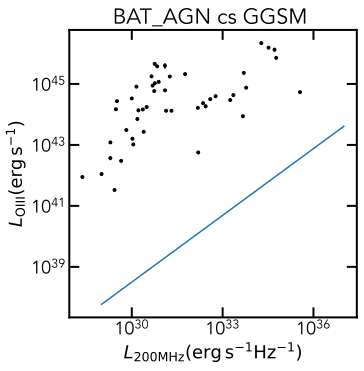

In [130]:
fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])


log_L200=np.linspace(29,37,10)
y_log_L200 = 0.73*log_L200+16.6


for i in range(len(data_BAT_70m_match)):
    seq_i=data_BAT_70m_match['Seq'][i]
    
    data_i= data_BAT_70m[data_BAT_70m['Seq']==seq_i]
    
    name_i=data_i['CName'][0]   
    z_i=data_i['z'][0]
    s200_i= GGSMmatch_data_BAT_70m['S_200'][i]
    
    if z_i and seq_i in OIII_Seq:
        d_cm_i= cosmo.luminosity_distance(z_i).to(u.cm).value 
        
        data_OIII_i=data_Koss17_t6[data_Koss17_t6['Seq']==seq_i]
        fOIII=data_OIII_i['F[OIII]5007'][0]
        e_fOIII=data_OIII_i['e_F[OIII]5007'][0]

        ax.errorbar(
                    x=s200_i*1e-23*4*np.pi*d_cm_i**2, #*200e6                    
                    y=fOIII*1e-12*4*np.pi*d_cm_i**2,#10-15W/m2 
                    yerr=e_fOIII*1e-12*4*np.pi*d_cm_i**2,#10-15W/m2 
            
                   color='black',
                   marker='.',
                   )

ax.plot(10**log_L200,10**y_log_L200)        
        
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

'''ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))
    '''
ax.semilogx()
ax.semilogy()
#set_ax_locator(ax,xma=1,xmi=0.5,yma=1,ymi=0.5)
set_ax_tick(ax)
ax.set_ylabel(r'$L_\mathrm{OIII} \mathrm{(erg\, s^{-1})}$')
ax.set_xlabel(r'$L_\mathrm{200MHz} \mathrm{(erg\, s^{-1} Hz^{-1})}$')
plt.title(r'BAT_AGN cs GGSM ')



Log L178 L [O  III]
L178 L  [O   III] 
L 178 [O III] FR
L178 OIII FR


<ipython-input-132-533a5631005c>:97: UserWarning: Warning: converting a masked element to nan.
  np.log10(y) ,


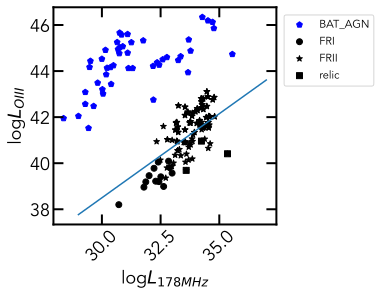

In [132]:
fig = plt.figure(figsize=(4,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

#ax.hist(BAT_105m_Seyfert_data_1['sigma_m_w1_neo'],bins=50,lw=2,histtype='step',ec='red', fc='red',label='Type1',linestyle='-.')

#ax.axvline(np.mean(BAT_105m_Seyfert_data_1['sigma_m_w1_neo']),color='red',ls=':')


        

#p3CR
plotdata=p3CR_V
column_x=3
column_y=4
print(plotdata.columns[column_x],plotdata.columns[column_y])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],
                   color='black',marker='*',label='FRII')

plotdata=p3CR_IV
column_x=4
column_y=2

print(plotdata.columns[column_x],plotdata.columns[column_y])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],
                   color='black',marker='s',label='relic')
        
        
        
plotdata=p3CR_III
column_x=4
column_y=3
column_l=7
print(plotdata.columns[column_x],plotdata.columns[column_y],plotdata.columns[column_l])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        if plotdata[plotdata.columns[column_l]][i]==1:
            label='FRI'
            marker='o'
        elif plotdata[plotdata.columns[column_l]][i]==2:
            label='FRII'
            marker='*'
        else:
            label=''
            
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],                   
                   color='black',marker=marker,label=label)
plotdata=p3CR_II
column_x=4
column_y=3
column_l=7

print(plotdata.columns[column_x],plotdata.columns[column_y],plotdata.columns[column_l])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        if plotdata[plotdata.columns[column_l]][i]==1:
            label='FRI'
            marker='o'
        elif plotdata[plotdata.columns[column_l]][i]==2:
            label='FRII'
            marker='*'
        else:
            label=''            
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],                   
                   color='black',marker=marker,label=label)
    
        
ax.plot(log_L200,y_log_L200)        
for i in range(len(data_BAT_70m_match)):
    seq_i=data_BAT_70m_match['Seq'][i]
    
    data_i= data_BAT_70m[data_BAT_70m['Seq']==seq_i]
    
    name_i=data_i['CName'][0]   
    z_i=data_i['z'][0]
    s200_i= GGSMmatch_data_BAT_70m['S_200'][i]
    
    if z_i and seq_i in OIII_Seq:
        d_cm_i= cosmo.luminosity_distance(z_i).to(u.cm).value 
        
        data_OIII_i=data_Koss17_t6[data_Koss17_t6['Seq']==seq_i]
        fOIII=data_OIII_i['F[OIII]5007'][0]
        e_fOIII=data_OIII_i['e_F[OIII]5007'][0]
        
        x=s200_i*1e-23*4*np.pi*d_cm_i**2, #*200e6                    
        y=fOIII*1e-12*4*np.pi*d_cm_i**2,#10-15W/m2 
        yerr=e_fOIII*1e-12*4*np.pi*d_cm_i**2,#10-15W/m2 
        
        ax.scatter(np.log10(x),
                   np.log10(y) ,           
                   color='b',
                   marker='p',label='BAT_AGN'
                   )



#ax.scatter(np.log10(L_HerA_178MHz_total),np.log10(L_HerA_OIII),color='red',marker='*',label='HerA tot')
#ax.scatter(np.log10(L_HerA_178MHz_core),np.log10(L_HerA_OIII),color='red',marker='o',label='HerA core')
#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'log$L_{178MHz}$')
ax.set_ylabel(r'log$L_{OIII}$')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('', dpi=400, transparent=False, bbox_inches='tight')


# crossmatch catalogs 
## SDSS imaging data && Stripe 82 standard stars

In [ ]:
?crossmatch_angular

In [ ]:
Returns
-------
dist, ind: ndarrays
    The angular distance and index of the closest point in X2 to
    each point in X1.  Both arrays are length N1.
    Locations with no match are indicated by
    dist[i] = inf, ind[i] = N2

In [ ]:
# crossmatch catalogs
max_radius = 1. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(imX, stX, max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

In [ ]:
ax = plt.axes()
hist(dist_match, bins='knuth', ax=ax,
     histtype='stepfilled', ec='k', fc='#AAAAAA')
ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (imX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)
ax.set_xlim(0, 0.5)

plt.show()

## SDSS imaging data and gleamdata

## SDSS Stripe 82 standard stars data

In [ ]:
# crossmatch catalogs
max_radius = 1. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(gleamX, stX, max_radius)
match = ~np.isinf(dist)

dist_match = dist[match]
dist_match *= 3600

### RA hist

In [ ]:
plt.hist(gleamX[:, 0])

In [ ]:
plt.hist(imX[:, 0])

In [ ]:
plt.hist(stX[:, 0])

In [ ]:
gleamX[:, 0][:5],imX[:,0][:-5]

# the AT20G Bright Source Sample (BSS) catalogue

one from a radio survey,   
J/MNRAS/384/775 Australia Telescope 20-GHz Survey. BSS (Massardi+, 2008)

#  the SuperCOSMOS all-sky galaxy catalogue.

http://ssa.roe.ac.uk/allSky

an optical survey

All-sky Galaxy catalogue
The purpose of this page is to make directly available the SuperCOSMOS all-sky galaxy catalogue, generated from scans of the UKST and POSS2 photographic Schmidt surveys and described in Peacock et al. (2016). This optical material was matched with WISE to produce the WISExSCOS photometric redshift catalogue.
What is released

A table of objects to optical limits of B<21.5, R<20; 
this is deeper than the limits adopted in the WISExSCOS work, allowing users to vary the limit if desired. The columns are objID, ra, dec, Bmag, Bcal, Bcc, Rmag, Rcal, Rcc, Imag, Ical, Icc, Ebmv. The various magnitudes are observed (mag), adjusted for the slight hemispheric offset between photometric systems as described in Peacock et al. (cal); further corrected for extinction (cc).
An additional table of objects that fill holes in the sky coverage left by calibration stepwedges on the plates. Mainly affecting POSS2 scans, these regions are omitted in the standard SSA database, although they can be accessed from the original SuperCOSMOS scans by using regions from an adjoining plate beyond the default central 5 x 5 degrees. The data in these regions is lower in quality, so we include only objects that paired up with WISE. The full SuperCOSMOS all-sky catalogue should be considered to consist of the main table plus these additional objects.
A table of calibration properties for the photographic plates that are the basis for the catalogue. Columns are Field number, B-band linearity, zero point, slump coefficient (and same for R & I); the three coefficients are defined in equations 9 & 11 of Peacock et al. (2016). The plate-centre positions of the UKST and POSS2 plates are listed in http://www.roe.ac.uk/ifa/wfau/ukstu/ukstf.html and http://www.roe.ac.uk/ifa/wfau/ukstu/possf.html. The POSS2 field numbers have been increased by 1000, in order to have a unique number over the whole sky. This information may be used if desired to mask out plates of lower depth as diagnosed by the zero point.

In [ ]:
def hms2dec(hours, minutes, seconds):
    result = 15 * (hours + minutes/60 + seconds/(60*60))
    return result


def dms2dec(degrees, arcminutes, arcseconds):
    if(degrees > 0):
        result = degrees + arcminutes/60 + arcseconds/(60*60)
    else:
        positive_degrees = degrees * -1
        result = -1 * (positive_degrees + arcminutes/60 + arcseconds/(60*60))

    return result

def import_bss():
    # Import file
    cat = np.loadtxt('/Users/brettlv/Downloads/mwa_paper/sample_cross_match/agn-cross-matching/data/bss.dat', usecols=range(1, 7))
    coordinates = []

    for index, row in enumerate(cat):
        ascention = hms2dec(row[0], row[1], row[2])
        declination = dms2dec(row[3], row[4], row[5])

        coordinates.append((index + 1, ascention, declination))

    return coordinates


def import_super():
    # Import file
    cat = np.loadtxt('/Users/brettlv/Downloads/mwa_paper/sample_cross_match/agn-cross-matching/data/super.csv', delimiter=',', skiprows=1, usecols=[0, 1])
    coordinates = []

    for index, row in enumerate(cat):
        coordinates.append((index + 1, row[0], row[1]))

    # Add index column
    return coordinates

In [ ]:
bss_cat = import_bss()
super_cat = import_super()

In [ ]:
bss_cat=np.array(bss_cat)
super_cat=np.array(super_cat)

In [ ]:
len(bss_cat)

## cross-match-bss-super

In [ ]:
bssX = np.empty((len(bss_cat), 2), dtype=np.float64)
bssX[:, 0] = bss_cat[:,1]
bssX[:, 1] = bss_cat[:,2]

superX = np.empty((len(super_cat), 2), dtype=np.float64)
superX[:, 0] = super_cat[:,1]
superX[:, 1] = super_cat[:,2]

In [ ]:
# crossmatch catalogs
max_radius = 40. / 3600  # 40 arcsec
dist, ind = crossmatch_angular(bssX, superX, max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

In [ ]:
len(bss_cat),len(super_cat)

In [ ]:
ax = plt.axes()
hist(dist_match, bins='knuth', ax=ax,
     histtype='stepfilled', ec='k', fc='#AAAAAA')
ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (bssX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)
ax.set_xlim(0, 30)

plt.show()

## bss-gleam

In [ ]:
plt.hist(bssX[:,1])

In [ ]:
plt.hist(gleamX[:,1])

In [ ]:
# crossmatch catalogs
max_radius = 3600. / 3600  # 40 arcsec
dist, ind = crossmatch_angular(bssX, gleamX, max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

ax = plt.axes()
hist(dist_match, bins='knuth', ax=ax,
     histtype='stepfilled', ec='k', fc='#AAAAAA')
ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (bssX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)
ax.set_xlim(0, 3600)

plt.show()

# SPITZER, GALEX, and GMRT mission catalogs

Python codes to implement multi-wavelength cross-matching of CSV data files of SPITZER, GALEX, and GMRT mission catalogs to create a master catalog

# The remnant radio galaxy associated with NGC 1534

In [ ]:
https://arxiv.org/pdf/1806.09255.pdf

# LAT 8-year Source Catalog (4FGL)

In [ ]:
FGL_4=fits.open('/Users/brettlv/Downloads/mwa_paper/gll_psc_v21.fit')

In [ ]:
FGL_4.info()

FGL_4[1].data.columns

FGL_4[2].header,FGL_4[2].data.columns

In [ ]:
name = 'Source_Name'; format = '18A'
name = 'RAJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
name = 'DEJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'

## FGL_4X 

In [ ]:
FGL_4X = np.empty((len(FGL_4[1].data), 2), dtype=np.float64)#LAT_Point_Source_Catalog
FGL_4X[:, 0] = FGL_4[1].data['RAJ2000']
FGL_4X[:, 1] = FGL_4[1].data['DEJ2000']

gleamALLX = np.empty((len(gleamdata), 2), dtype=np.float64)
gleamALLX[:, 0] = gleamdata['RAJ2000']
gleamALLX[:, 1] = gleamdata['DEJ2000']

## FGL-gleam cross

In [ ]:
len(FGL_4[1].data)

In [ ]:
# crossmatch catalogs

max_radius = 60 / 3600  # 60 arcsec
dist, ind = crossmatch_angular(FGL_4X,gleamALLX, max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec


ax = plt.axes()
hist(dist_match, bins='knuth', ax=ax,
     histtype='stepfilled', ec='k', fc='#AAAAAA')
ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.65,
        "Total objects: %i\nNumber with match: %i" % (FGL_4X.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)
ax.set_xlim(0, 60)
plt.title('crossmatch of gleam and 4FGL')
plt.savefig('/Users/brettlv/Downloads/cross-match_of_gleam_and_4FGL.png',dpi=300)
plt.show()

In [ ]:
len(match)

In [ ]:
FGL_4Xsourecename=FGL_4[1].data['Source_Name']

matchname=FGL_4Xsourecename[match]
matchra=FGL_4[1].data['RAJ2000'][match]
matchdec=FGL_4[1].data['DEJ2000'][match]

In [ ]:
print('name,')
for i,j,k,l in zip(matchname,matchra,matchdec,dist_match):
    print(i,j,k,l)

# RRAT 
http://astro.phys.wvu.edu/rratalog/

In [ ]:
PSRJ            J1913+1330
RAJ             19:13:17.97                   1.000e-02
DECJ            +13:30:32.78                  4.000e-02
DM              175.64                        6.000e-02

In [ ]:
19*15+13*15/60+17.97*15/3600

In [ ]:
13+30/60+32.78/3600

In [ ]:
J1913+1330	0.923	8.68	175.64	19:13:18	13:30:33	47.42	1.38	4.71	,'12.4	6.2	5.7	--	--	650	--	--	2	945	40	PM1 / K11

# mwa_project_table

In [ ]:
import pandas as pd
import xml.etree.ElementTree as ET

from astropy.io.votable import parse
from astropy.io.votable import parse_single_table
from astropy.io.votable.tree import VOTableFile, Resource, Table, Field



path = '/Users/brettlv/Downloads/results_from-2018-03-10-D0014-outburstmonitoring.xml'
votable = parse(path)

table = parse_single_table(path)


data = table.array
dfcols = ['obs_id','s_ra', 's_dec', 's_fov','t_min','t_max','t_exptime','em_min','em_max']
#df = pd.DataFrame(columns=dfcols)
#df.head()

In [ ]:
table = parse_single_table(path).to_table()

In [ ]:
table.colnames[10],table.colnames[11]

In [ ]:
fix,ax=plt.subplots(1, 1,figsize=(12,9))
for i,j in zip(table[table.colnames[10]],table[table.colnames[11]]):
    plt.scatter(i,j)
plt.xlabel('t_start')
plt.ylabel('t_end')
plt.title('D0014_outburst_monitoring_MAXIJ1820')
plt.savefig('/Users/brettlv/Downloads/MAXIJ1820/D0014_outburst_monitoring.png')

In [ ]:
path_gleam = '/Users/brettlv/Downloads/results_gleam_30degree.xml'
table_gleam = parse_single_table(path_gleam).to_table()

In [ ]:
fix,ax=plt.subplots(1, 1,figsize=(12,9))
for i,j in zip(table_gleam[table_gleam.colnames[10]],table_gleam[table_gleam.colnames[11]]):
    plt.scatter(i,j)
plt.xlabel('t_start')
plt.ylabel('t_end')
plt.title('D0008_GLEAM_MAXIJ1820')
plt.savefig('/Users/brettlv/Downloads/MAXIJ1820/D0008_GLEAM_MAXIJ1820.png')

In [ ]:
from astropy.io import fits

In [ ]:
hd=fits.open('/Users/brettlv/CIAO/Mrk1018chandradata/chandra/12868/repro/acisf12868_repro_evt2.fits')

hd.info()

hd[0].header

hd[1].header

In [ ]:
hd_evt1=fits.open('/Users/brettlv/CIAO/Mrk1018chandradata/chandra/12868/secondary/acisf12868_000N003_evt1.fits')

In [ ]:
hd_pileup=fits.open('/Users/brettlv/CIAO/Mrk1018chandradata/chandra/12868/repro/pileup_12868.fits')

In [ ]:
hd_pileup.info()

In [ ]:
hd_pileup[0].header

In [ ]:
hd_pileup[1].header

In [ ]:
hd_pileup[0].data.shape

In [ ]:
hd_pileup[0].data

In [ ]:
hd_pileup[1].data

hd[0].header

hd[1].header

In [ ]:
hd1=fits.open('/Users/brettlv/CIAO/Mrk1018chandradata/chandra/18789/repro/acisf18789_repro_evt2.fits')

In [ ]:
hd1.info()

In [ ]:
hd1[0].header